In [1]:
import pandas as pd
import numpy as np

all_data1 = pd.read_excel("./buffer.xlsx", sheet_name="15")
all_data2 = pd.read_excel("./buffer.xlsx", sheet_name="16")
all_data3 = pd.read_excel("./buffer.xlsx", sheet_name="17")
all_data_c1 = all_data1.copy()
all_data_c2 = all_data2.copy()
all_data_c3 = all_data3.copy()
'''
all_data1 = all_data_c1
all_data2 = all_data_c2
all_data3  = all_data_c3
all_data1.head()
'''
all_data1.fillna(0)
all_data2.fillna(0)
all_data3.fillna(0)
print(all_data1.isnull().sum())
data_map = []

DZEH【动物耳号】                                         0
XKZH【许可证号】                                         0
NCBH【农场编号】                                       600
STATUS【状态】（0：合格；1：不合格）                             0
YBMC【疫病名称】                                    162155
JCJG【检测结果】                                    162541
TTZL【淘汰种类】（G:个体淘汰;Q:规定疫病种类全群淘汰；C：阳性结果超限淘汰）    120256
LCID【流程ID】                                     97661
XB【性别】                                             0
PZ【品种】                                           315
TZZT【屠宰状态】                                    182038
ACTIONMC【操作步骤】                                 99677
CLYY【处理原因】                                    132959
dtype: int64


In [2]:
all_data1.head()

,DZEH【动物耳号】,XKZH【许可证号】,NCBH【农场编号】,STATUS【状态】（0：合格；1：不合格）,YBMC【疫病名称】,JCJG【检测结果】,TTZL【淘汰种类】（G:个体淘汰;Q:规定疫病种类全群淘汰；C：阳性结果超限淘汰）,LCID【流程ID】,XB【性别】,PZ【品种】,TZZT【屠宰状态】,ACTIONMC【操作步骤】,CLYY【处理原因】
0,951 000000002554,AA0015011493,EFAU06779,1,NaN,NaN,B,10575.0,雌,牛,NaN,临床检查,临床检查淘汰
1,951 000000002555,AA0015011493,EFAU06779,1,NaN,NaN,B,10575.0,雌,牛,NaN,临床检查,临床检查淘汰
2,951 000000002565,AA0015011493,EFAU11174,1,NaN,NaN,NaN,10575.0,雌,牛,NaN,临床检查,临床检查淘汰
3,951 000000002568,AA0015011493,EFAU11174,1,NaN,NaN,NaN,10575.0,雌,牛,NaN,临床检查,临床检查淘汰
4,951 000000002621,AA0015011493,EFAU11174,1,NaN,NaN,NaN,10575.0,雌,牛,NaN,临床检查,临床检查淘汰


In [3]:
columns_name = all_data1.columns.values.tolist()
for i in range(len(columns_name)):
    columns_name[i] = columns_name[i].split("【")[0]
    columns_name[i] = columns_name[i].split(" ")[0]
all_data1.columns = columns_name
all_data2.columns = columns_name
all_data3.columns = columns_name

In [4]:
import re
buffer = []
voc_XKZH_1 = all_data1["XKZH"].unique()
voc_XKZH_2 = all_data2["XKZH"].unique()
voc_XKZH_3 = all_data3["XKZH"].unique()
voc_XKZH = np.hstack([voc_XKZH_1, voc_XKZH_2])
voc_XKZH = np.hstack([voc_XKZH, voc_XKZH_3])
for i in voc_XKZH:
    if i == "" or i == None or i == "无":
        continue
    i = str(i)
    if re.match("\d", i[0:2]):
        continue
    else:
        buffer.append(i[0:2])

In [5]:
buffer = list(set(buffer))
print(buffer)
data_map.append(buffer)

['AA', 'AF']


In [6]:
all_data1["XKZH"] = all_data1["XKZH"].map(lambda XKZH: buffer.index(str(XKZH)[0:2])+1 if str(XKZH)[0:2] in buffer else 0)
all_data2["XKZH"] = all_data2["XKZH"].map(lambda XKZH: buffer.index(str(XKZH)[0:2])+1 if str(XKZH)[0:2] in buffer else 0)
all_data3["XKZH"] = all_data3["XKZH"].map(lambda XKZH: buffer.index(str(XKZH)[0:2])+1 if str(XKZH)[0:2] in buffer else 0)

In [7]:
buffer = []
voc_DZEH_1 = all_data1["DZEH"].unique()
voc_DZEH_2 = all_data2["DZEH"].unique()
voc_DZEH_3 = all_data3["DZEH"].unique()
voc_DZEH = np.hstack([voc_DZEH_1, voc_DZEH_2])
voc_DZEH = np.hstack([voc_DZEH, voc_DZEH_3])
for i in voc_DZEH:
    if i == "" or i == None or i == "无":
        continue
    i = str(i)
    if i == "nan":
        buffer.append("nan")
    if re.match("\d", i[0:2]):
        continue
    else:
        buffer.append(i[0:2])

In [8]:
buffer = list(set(buffer))
print(buffer)
data_map.append(buffer)

['OR', 'K1', 'FR', 'S5', 'QY', 'M4', 'D4', 'DG', 'J9', 'LN', 'P8', 'SS', 'GF', 'H5', 'R4', 'L1', 'J8', 'H8', 'Z0', 'G5', 'E2', 'Z6', 'SV', 'S2', 'SF', 'RT', 'Y5', 'BG', 'Wa', 'Z2', 'X4', 'S6', 'S1', 'L4', 'M1', 'C7', 'C4', 'H7', 'AB', 'H3', 'R7', 'A5', 'R2', 'F4', 'G4', 'BP', 'C8', 'Z3', 'Z5', 'K2', 'FF', 'J2', 'R8', 'P2', 'K5', 'M2', 'WH', 'BE', 'Y8', 'QR', 'K4', 'E3', 'QX', 'C2', 'Y6', 'K7', 'C9', 'A9', 'K3', 'G3', 'DC', '"W', 'A0', 'P4', 'P7', '"B', 'J4', 'M3', 'RS', 'P6', 'Y7', 'PU', 'A1', 'A4', 'G7', 'H2', 'H9', 'A6', 'F0', 'D2', 'B7', 'X6', 'WF', 'A8', 'P9', 'GO', 'K9', 'YE', 'M6', 'R6', 'S3', 'K8', 'PM', 'X0', 'B1', 'J7', 'C5', 'B3', 'R3', 'SM', 'B2', 'Y9', 'E6', 'R9', 'M8', 'E1', 'X7', 'R5', 'S9', 'J1', 'E7', 'YN', 'E5', 'G6', 'BL', 'B8', 'Y0', 'F3', 'D0', 'LS', 'Y2', 'D3', 'GR', 'A3', 'S4', 'H6', 'F1', 'D1', 'X1', 'o9', 'P1', 'o ', 'C0', 'o8', 'NO', 'A2', 'X2', 'WT', 'A7', 'SN', 'C6', 'UN', 'PO', 'P3', 'KP', 'S7', 'H0', 'M5', 'QT', 'P5', 'G0', 'LE', 'B5', 'E4', 'G1', 'H1', 'J3

In [9]:
all_data1["DZEH"] = all_data1["DZEH"].map(lambda DEZH: buffer.index(str(DEZH)[0:2])+1 if str(DEZH)[0:2] in buffer else 0)
all_data2["DZEH"] = all_data2["DZEH"].map(lambda DEZH: buffer.index(str(DEZH)[0:2])+1 if str(DEZH)[0:2] in buffer else 0)
all_data3["DZEH"] = all_data3["DZEH"].map(lambda DEZH: buffer.index(str(DEZH)[0:2])+1 if str(DEZH)[0:2] in buffer else 0)

In [10]:
buffer = []
voc_NCBH_1 = all_data1["NCBH"].unique()
voc_NCBH_2 = all_data2["NCBH"].unique()
voc_NCBH_3 = all_data3["NCBH"].unique()
voc_NCBH = np.hstack([voc_NCBH_1, voc_NCBH_2])
voc_NCBH = np.hstack([voc_NCBH, voc_NCBH_3])
for i in voc_NCBH:
    if i == "" or i == None or i == "无":
        continue
    i = str(i)
    if i == "nan":
        buffer.append("nan")
    if re.match("\d", i[0:4]):
        continue
    else:
        buffer.append(i[0:4])

In [11]:
buffer = list(set(buffer))
print(buffer)
data_map.append(buffer)

['EFUY', 'EFUS', 'EFMN', 'nan', 'EFDK', 'EFNL', 'EFNZ', 'EFFR', 'EFAU', 'EFCL', 'EFCA']


In [12]:
all_data1["NCBH"] = all_data1["NCBH"].map(lambda NCBH: buffer.index(str(NCBH)[0:4])+1 if str(NCBH)[0:4] in buffer else 0)
all_data2["NCBH"] = all_data2["NCBH"].map(lambda NCBH: buffer.index(str(NCBH)[0:4])+1 if str(NCBH)[0:4] in buffer else 0)
all_data3["NCBH"] = all_data3["NCBH"].map(lambda NCBH: buffer.index(str(NCBH)[0:4])+1 if str(NCBH)[0:4] in buffer else 0)

In [13]:
buffer = []
voc_NCBH_1 = all_data1["YBMC"].unique()
voc_NCBH_2 = all_data2["YBMC"].unique()
voc_NCBH_3 = all_data3["YBMC"].unique()
voc_NCBH = np.hstack([voc_NCBH_1, voc_NCBH_2])
voc_NCBH = np.hstack([voc_NCBH, voc_NCBH_3])
for i in voc_NCBH:
    if i == "" or i == None or i == "无":
        continue
    i = str(i)
    if i == "nan":
        buffer.append("nan")
    else:
        i = i.split(",")
        for text in i:
            if text != "":
                buffer.append(text)
buffer = list(set(buffer))
buffer[buffer.index("nan")] = buffer[0]
buffer[0] = "nan"
buffer = list(set(buffer))
data_map.append(buffer)
all_data1.describe()

,DZEH,XKZH,NCBH,STATUS,LCID
count,182188.000000,182188.000000,182188.000000,182188.000000,84527.000000
mean,40.684035,1.006471,8.851527,0.270391,17029.651058
std,55.428563,0.080184,0.801091,0.444163,5796.683695
min,0.000000,1.000000,3.000000,0.000000,9202.000000
25%,0.000000,1.000000,9.000000,0.000000,10162.000000
50%,0.000000,1.000000,9.000000,0.000000,20117.000000
75%,88.000000,1.000000,9.000000,1.000000,22053.000000
max,185.000000,2.000000,11.000000,1.000000,24659.000000


In [14]:
def in2list(text_area, buffer):
    text_area = str(text_area)
    index_buffer = np.zeros([4,])
    if text_area =="nan" or text_area=="" or text_area == "无":
        return index_buffer
    for i,var in enumerate(text_area.split(",")):
        index_buffer[i] = buffer.index(var)+1
    return index_buffer
a  = "蓝舌病,猪传染性胃肠炎,猪支原体肺炎"
print(buffer)
print(in2list(a, buffer))
data_map.append(buffer)

['边界病', '猪生殖和呼吸系统综合症', 'nan', '牛传染性鼻气管炎', '布氏杆菌病', '伪狂犬病', '猪传染性胃肠炎', '猪繁殖与呼吸综合症', '鹿流行性出血热', '享德拉病毒', '牛病毒性腹泻', '猪传染性胸膜肺炎', '猪支原体肺炎', '猪繁殖与呼吸道综合征', '副结核病', '马病毒性动脉炎', '衣原体病', '马媾疫', '牛病毒性腹泻\n', '马鼻腔肺炎', '阳性结果超限淘汰', '赤羽病', '蓝舌病', '猪蓝耳病', '布氏杆菌', '0', '规定疫病种类全群淘汰', '结核病', 'Q热', '马鼻肺炎', '马流感', '牛地方流行性白血病', '马鼻疽']
[23.  7. 13.  0.]


In [15]:
all_data1["YBMC"] = all_data1["YBMC"].map(lambda YBMC: in2list(YBMC, buffer))
all_data2["YBMC"] = all_data2["YBMC"].map(lambda YBMC: in2list(YBMC, buffer))
all_data3["YBMC"] = all_data3["YBMC"].map(lambda YBMC: in2list(YBMC, buffer))

In [16]:
buffer_dic = {
    "阳性":1,
    "阴":0,
}
voc = ["阳性"]
data_map.append(voc)
all_data1["JCJG"] = all_data1["JCJG"].map(lambda TTLZ: 1 if TTLZ=="阳性" else 0)
all_data2["JCJG"] = all_data2["JCJG"].map(lambda TTLZ: 1 if TTLZ=="阳性" else 0)
all_data3["JCJG"] = all_data3["JCJG"].map(lambda TTLZ: 1 if TTLZ=="阳性" else 0)


In [17]:
buffer_dic = ["G", "B", "C", "Q"]
data_map.append(buffer_dic)
all_data1["TTZL"] = all_data1["TTZL"].map(lambda TTLZ: buffer_dic.index(TTLZ) if TTLZ in buffer_dic else 0)
all_data2["TTZL"] = all_data2["TTZL"].map(lambda TTLZ: buffer_dic.index(TTLZ) if TTLZ in buffer_dic else 0)
all_data3["TTZL"] = all_data3["TTZL"].map(lambda TTLZ: buffer_dic.index(TTLZ) if TTLZ in buffer_dic else 0)

In [18]:
all_data1.LCID.fillna(0)
all_data2.LCID.fillna(0)
all_data3.LCID.fillna(0)
voc = all_data1.LCID.unique()
voc = np.hstack([voc, all_data2.LCID.unique()])
voc = np.hstack([voc, all_data3.LCID.unique()])
voc = list(set(voc))
for i,val in enumerate(voc):
    if val == np.nan:
        voc[i] = 0
voc = np.nan_to_num(voc)

In [19]:
voc = list(set(voc))
voc = list(np.sort(voc))

In [20]:
all_data1["LCID"] = all_data1["LCID"].map(lambda LCID: voc.index(LCID) if LCID in voc else 0)
all_data2["LCID"] = all_data2["LCID"].map(lambda LCID: voc.index(LCID) if LCID in voc else 0)
all_data3["LCID"] = all_data3["LCID"].map(lambda LCID: voc.index(LCID) if LCID in voc else 0)
all_data1.head()

,DZEH,XKZH,NCBH,STATUS,YBMC,JCJG,TTZL,LCID,XB,PZ,TZZT,ACTIONMC,CLYY
0,0,1,9,1,"[0.0, 0.0, 0.0, 0.0]",0,1,93,雌,牛,NaN,临床检查,临床检查淘汰
1,0,1,9,1,"[0.0, 0.0, 0.0, 0.0]",0,1,93,雌,牛,NaN,临床检查,临床检查淘汰
2,0,1,9,1,"[0.0, 0.0, 0.0, 0.0]",0,0,93,雌,牛,NaN,临床检查,临床检查淘汰
3,0,1,9,1,"[0.0, 0.0, 0.0, 0.0]",0,0,93,雌,牛,NaN,临床检查,临床检查淘汰
4,0,1,9,1,"[0.0, 0.0, 0.0, 0.0]",0,0,93,雌,牛,NaN,临床检查,临床检查淘汰


In [21]:
all_data1.XB.fillna("无性")
all_data2.XB.fillna("无性")
all_data3.XB.fillna("无性")
voc = ["雌", "雄", "无性"]
data_map.append(voc)
all_data1["XB"] = all_data1["XB"].map(lambda XB: voc.index(XB) if XB in voc else 0)
all_data2["XB"] = all_data2["XB"].map(lambda XB: voc.index(XB) if XB in voc else 0)
all_data3["XB"] = all_data3["XB"].map(lambda XB: voc.index(XB) if XB in voc else 0)
all_data1.head()


,DZEH,XKZH,NCBH,STATUS,YBMC,JCJG,TTZL,LCID,XB,PZ,TZZT,ACTIONMC,CLYY
0,0,1,9,1,"[0.0, 0.0, 0.0, 0.0]",0,1,93,0,牛,NaN,临床检查,临床检查淘汰
1,0,1,9,1,"[0.0, 0.0, 0.0, 0.0]",0,1,93,0,牛,NaN,临床检查,临床检查淘汰
2,0,1,9,1,"[0.0, 0.0, 0.0, 0.0]",0,0,93,0,牛,NaN,临床检查,临床检查淘汰
3,0,1,9,1,"[0.0, 0.0, 0.0, 0.0]",0,0,93,0,牛,NaN,临床检查,临床检查淘汰
4,0,1,9,1,"[0.0, 0.0, 0.0, 0.0]",0,0,93,0,牛,NaN,临床检查,临床检查淘汰


In [22]:
all_data1["TZZT"] = all_data1["TZZT"].map(lambda TZZT: 1 if TZZT == "已屠宰" else 0)
all_data2["TZZT"] = all_data2["TZZT"].map(lambda TZZT: 1 if TZZT == "已屠宰" else 0)
all_data3["TZZT"] = all_data3["TZZT"].map(lambda TZZT: 1 if TZZT == "已屠宰" else 0)
all_data1.head()

,DZEH,XKZH,NCBH,STATUS,YBMC,JCJG,TTZL,LCID,XB,PZ,TZZT,ACTIONMC,CLYY
0,0,1,9,1,"[0.0, 0.0, 0.0, 0.0]",0,1,93,0,牛,0,临床检查,临床检查淘汰
1,0,1,9,1,"[0.0, 0.0, 0.0, 0.0]",0,1,93,0,牛,0,临床检查,临床检查淘汰
2,0,1,9,1,"[0.0, 0.0, 0.0, 0.0]",0,0,93,0,牛,0,临床检查,临床检查淘汰
3,0,1,9,1,"[0.0, 0.0, 0.0, 0.0]",0,0,93,0,牛,0,临床检查,临床检查淘汰
4,0,1,9,1,"[0.0, 0.0, 0.0, 0.0]",0,0,93,0,牛,0,临床检查,临床检查淘汰


In [23]:
buffer = []
voc_ACTIONMC_1 = all_data1["ACTIONMC"].unique()
voc_ACTIONMC_2 = all_data2["ACTIONMC"].unique()
voc_ACTIONMC_3 = all_data3["ACTIONMC"].unique()
voc_ACTIONMC = np.hstack([voc_ACTIONMC_1, voc_ACTIONMC_2])
voc_ACTIONMC = np.hstack([voc_ACTIONMC, voc_ACTIONMC_3])
for i in voc_ACTIONMC:
    if i == "" or i == None or i == "无":
        continue
    i = str(i)
    if i == "nan":
        buffer.append("nan")
    else:
        i = i.split(",")
        for text in i:
            if text != "":
                buffer.append(text)
buffer = list(set(buffer))
buffer[buffer.index("nan")] = buffer[0]
buffer[0] = "nan"
buffer = list(set(buffer))
buffer.pop(buffer.index("0"))
_=buffer.pop(buffer.index("nan"))

In [24]:
print(buffer)
data_map.append(buffer)

['进场检疫', '临床检查', '检测结果判定', '农场资质审定', '样品送检', '入境口岸现场检疫', '运输监管', '动物入场', '出口编号', '其他原因淘汰动物', '监督装运']


In [25]:
all_data1["ACTIONMC"] = all_data1["ACTIONMC"].map(lambda ACTIONMC: buffer.index(ACTIONMC)+1 if ACTIONMC in buffer else 0)
all_data2["ACTIONMC"] = all_data2["ACTIONMC"].map(lambda ACTIONMC: buffer.index(ACTIONMC)+1 if ACTIONMC in buffer else 0)
all_data3["ACTIONMC"] = all_data3["ACTIONMC"].map(lambda ACTIONMC: buffer.index(ACTIONMC)+1 if ACTIONMC in buffer else 0)
all_data1.head()

,DZEH,XKZH,NCBH,STATUS,YBMC,JCJG,TTZL,LCID,XB,PZ,TZZT,ACTIONMC,CLYY
0,0,1,9,1,"[0.0, 0.0, 0.0, 0.0]",0,1,93,0,牛,0,2,临床检查淘汰
1,0,1,9,1,"[0.0, 0.0, 0.0, 0.0]",0,1,93,0,牛,0,2,临床检查淘汰
2,0,1,9,1,"[0.0, 0.0, 0.0, 0.0]",0,0,93,0,牛,0,2,临床检查淘汰
3,0,1,9,1,"[0.0, 0.0, 0.0, 0.0]",0,0,93,0,牛,0,2,临床检查淘汰
4,0,1,9,1,"[0.0, 0.0, 0.0, 0.0]",0,0,93,0,牛,0,2,临床检查淘汰


In [26]:
buffer = {"羊":[0,0, 0],
          "萨福克":[0, 1, 0],
          "黑萨福克":[0, 1, 1],
          "白萨福克":[0, 1, 2],
          "杜泊":[0, 2, 0],
          "白杜泊":[0, 2, 1],
          "黑杜泊":[0, 2, 2],
          "绵羊":[0, 3, 0],
          "山羊":[0, 4, 0],
          "猪":[1, 0, 0],
          "大白种猪":[1, 1, 0],
          "Yorkshire":[1, 1, 0],
          "Large White":[1, 1, 0],
          "LW":[1, 1, 0],
          "杜洛克":[1, 2, 0],
          "Duroc":[1, 2, 0],
          "LR":[1, 3, 0],
          "皮特兰":[1, 4, 0],
          "长白猪":[1, 5, 0],
          "DD猪":[1, 0, 0],
          "LL猪":[1, 0, 0],
          "YY猪":[1,0,0],
          "牛":[2, 0, 0],
          "即宰牛":[2,1,0],
          "屠宰牛":[2, 1, 0],
          "种牛":[2, 2, 0],
          "荷斯坦":[2, 3, 0],
          "Holstein":[2, 4, 0],
          "肉牛":[2, 5, 0],
          "Fleckvieh":[2, 6, 0],
          "Friesian":[2, 7, 0],
          "Hereford":[2, 8, 0],
          "Jersey":[2, 9, 0],
          "Simmental":[2, 10, 0],
          "Wagu":[2, 11, 0],
          "Samm":[2, 12, 0],
          "马":[3, 0, 0],
          "赛马":[3, 1, 0],
          "蒙古马":[3, 2, 0],
          "羊驼":[4, 0, 0],
          }
data_map.append(buffer)

In [27]:
all_data1["PZ"] = all_data1["PZ"].map(lambda PZ: buffer[PZ] if PZ in buffer else [0, 0, 0])
all_data2["PZ"] = all_data2["PZ"].map(lambda PZ: buffer[PZ] if PZ in buffer else [0, 0, 0])
all_data3["PZ"] = all_data3["PZ"].map(lambda PZ: buffer[PZ] if PZ in buffer else [0, 0, 0])
all_data1.head()

,DZEH,XKZH,NCBH,STATUS,YBMC,JCJG,TTZL,LCID,XB,PZ,TZZT,ACTIONMC,CLYY
0,0,1,9,1,"[0.0, 0.0, 0.0, 0.0]",0,1,93,0,"[2, 0, 0]",0,2,临床检查淘汰
1,0,1,9,1,"[0.0, 0.0, 0.0, 0.0]",0,1,93,0,"[2, 0, 0]",0,2,临床检查淘汰
2,0,1,9,1,"[0.0, 0.0, 0.0, 0.0]",0,0,93,0,"[2, 0, 0]",0,2,临床检查淘汰
3,0,1,9,1,"[0.0, 0.0, 0.0, 0.0]",0,0,93,0,"[2, 0, 0]",0,2,临床检查淘汰
4,0,1,9,1,"[0.0, 0.0, 0.0, 0.0]",0,0,93,0,"[2, 0, 0]",0,2,临床检查淘汰


In [28]:
buffer = []
voc_CLYY_1 = all_data1["CLYY"].unique()
voc_CLYY_2 = all_data2["CLYY"].unique()
voc_CLYY_3 = all_data3["CLYY"].unique()
voc_CLYY = np.hstack([voc_CLYY_1, voc_CLYY_2])
voc_CLYY = np.hstack([voc_CLYY, voc_CLYY_3])
for i in voc_CLYY:
    if i == "" or i == None or i == "无":
        continue
    i = str(i)
    if i == "nan":
        buffer.append("nan")
    else:
        i = i.split(",")
        for text in i:
            if text != "":
                buffer.append(text)
buffer = list(set(buffer))
buffer[buffer.index("nan")] = buffer[0]
buffer[0] = "nan"
buffer = list(set(buffer))
buffer.pop(buffer.index("0"))
_=buffer.pop(buffer.index("nan"))

In [29]:
res = ""
for i in buffer:
    res += (i).replace("\n", "")
import jieba as jb
seg_list = jb.cut(res, cut_all=False)
res = " ".join(jb.cut(res, cut_all=False))
res = res.split(" ")
for i, val in enumerate(res):
    if re.match(u"[\u4e00-\u9fa5]+",val):
        res[i] = re.match(u"[\u4e00-\u9fa5]+",val)[0]
##去除主语，按照动物+病的模式生成最长字典：同时删除
buffer = {
'隔离期间消化系统疾病死亡':['隔离', '消化系统', '死亡'],
'TB皮内变态反应': ['TB', '反应'],
 '0': [], 
'机械性死亡': ['机械', '死亡'], 
'进场过程中死亡，解剖见瘤胃积食': ['进场', '死亡', '积食'], 
'孕检不合格': ['孕检', '不合格'],
'赤羽病抗体阳性': ['赤羽', '抗体', '阳性'], 
'传染性胸膜肺炎抗体阳性': ['胸膜肺炎', '抗体', '阳性'],
'腿脚伤':['腿脚','创伤'],
'正常死亡': ['正常', '死亡'],
'PPD': ['PPD'],
'汽车运输途中死亡': ['运输', '死亡'],
'眼疾': ['眼疾'], 
'同群结核病全群淘汰': ['结核病', '淘汰'],
'出口商淘汰': ['出口', '淘汰'],
'外伤严重未卸船': ['外伤', '未卸船'],
'在入场后到采血前期间应激死亡': ['进场', '采血', '应激', '死亡'], 
'外伤': ['外伤'],
'牛传染性鼻气管炎可疑': ['牛', '鼻气管炎', '可疑'],
'死于创伤意外。': ['创伤', '死亡'], 
'出现应激反应，双腿无法站立，经随船兽医处理无效，放弃。': ['应激', '腿脚', '放弃'],
'临床检查淘汰': ['临检', '淘汰'], 
'海运途中因体质较弱，卧地不起死亡。': ['海运', '卧底', '死亡'],
'运输途中死亡': ['运输', '死亡'], 
'死于急性腹膜炎。': ['腹膜炎', '死亡'], 
'病毒性腹泻/粘膜病抗体阳性': ['腹泻', '粘膜病', '阳性'], 
'IBR检出率大于50%': ['IBR'], 
'生殖缺陷': ['生殖', '缺陷'], 
'农场主未发运': ['未发运'],
'丢失': ['丢失'], 
'海运途中因瘤胃臌气死亡。': ['海运', '瘤胃臌气', '死亡'], 
'兰舌病抗体阳性': ['蓝舌病', '阳性'], 
'体重不符合装运要求': ['体重', '不合格'], 
'疝气': ['疝气'], 
'外伤严重淘汰': ['外伤', '淘汰'], 
'采血前死亡，解剖见肝脏肿大，有血，脾脏肿大腹围增大': ['采血', '肝脏', '死亡'],
'农场资质审定不合格': ['资审', '不合格'], 
'脱肛': ['脱肛'], 
'品种问题淘汰': ['品种', '淘汰'], 
'海运途中因酸中毒死亡。': ['海运', '酸中毒', '死亡'],
'原农场主拒绝销售':['拒绝销售'], 
'隔离检疫死亡': ['检疫', '死亡'], 
'蓝舌病检测可疑动物个体淘汰。': ['蓝舌病', '可疑', '淘汰'], 
'nan':[], 
'接卸期间死亡': ['接卸', '死亡'], 
'采血前死亡，解剖见肺脓肿，大量血块，粘连': ['采血', '死亡', '肺脓肿'], 
'海运途中因腿部骨折死亡。':['海运', '腿脚', '骨折', '死亡'], 
'副结核抗体阳性': ['结核抗体', '阳性'], 
'蠕虫性皮肤病': ['蠕虫', '皮肤病'], 
'腿病': ['腿病'], 
'因心肌炎死亡': ['心肌炎', '死亡'], 
'隔离场进场前临场及生殖检查淘汰': ['进场', '临检', '生殖检查', '淘汰'],
'海运死亡': ['海运', '死亡'], 
'死于呼吸系统疾病。': ['呼吸系统疾病', '死亡'], 
'进口商挑选淘汰': ['进口商', '淘汰'], 
'瘸/跛腿': ['腿脚', '瘸腿'], 
'体弱，体型过小': ['体弱', '体型小'], 
'蹄病': ['蹄病'], 
'直肠检查不合格': ['直肠检查', '不合格'], 
'蓝舌病可疑，淘汰个体': ['蓝舌病', '可疑', '淘汰'], 
'未采血': ['未采血'], 
'瘦弱/不进食': ['体弱', '不进食'], 
'其他': ['其他'], 
'卸船过程中肌体严重消瘦、不符合交货条件，未卸离船舶。': ['卸船', '消瘦', '不合格'], 
'未下船': ['未下船'], 
'因坏死性肺炎死亡': ['坏死性肺炎', '死亡'], 
'疥癣': ['疥癣'], 
'耳号有误': ['耳号', '错误'],
'原农场饲养未满6个月': ['饲养未满', '6个月'], 
'阳性': ['阳性']}
rank_buffer = []
for key in buffer:
    for var in buffer[key]:
        if var not in rank_buffer:
            rank_buffer.append(var)
print(rank_buffer)
print(len(rank_buffer))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\jax500\AppData\Local\Temp\jieba.cache
Loading model cost 0.592 seconds.
Prefix dict has been built succesfully.


['隔离', '消化系统', '死亡', 'TB', '反应', '机械', '进场', '积食', '孕检', '不合格', '赤羽', '抗体', '阳性', '胸膜肺炎', '腿脚', '创伤', '正常', 'PPD', '运输', '眼疾', '结核病', '淘汰', '出口', '外伤', '未卸船', '采血', '应激', '牛', '鼻气管炎', '可疑', '放弃', '临检', '海运', '卧底', '腹膜炎', '腹泻', '粘膜病', 'IBR', '生殖', '缺陷', '未发运', '丢失', '瘤胃臌气', '蓝舌病', '体重', '疝气', '肝脏', '资审', '脱肛', '品种', '酸中毒', '拒绝销售', '检疫', '接卸', '肺脓肿', '骨折', '结核抗体', '蠕虫', '皮肤病', '腿病', '心肌炎', '生殖检查', '呼吸系统疾病', '进口商', '瘸腿', '体弱', '体型小', '蹄病', '直肠检查', '未采血', '不进食', '其他', '卸船', '消瘦', '未下船', '坏死性肺炎', '疥癣', '耳号', '错误', '饲养未满', '6个月']
81


In [30]:
##对此字段集合再次清洗，归并意义词，减少计算量
def get_function(in_str):
    res = np.zeros([4,])
    if in_str in buffer:
        in_str = buffer[in_str]
        for i,ind in enumerate(in_str):
            if ind in rank_buffer:
                res[i] = rank_buffer.index(ind)
            else:
                res[i] = 0
        return res
    else:
        return np.zeros([4,])
all_data1["CLYY"] = all_data1["CLYY"].map(lambda CLYY: get_function(CLYY))
all_data2["CLYY"] = all_data2["CLYY"].map(lambda CLYY: get_function(CLYY))
all_data3["CLYY"] = all_data3["CLYY"].map(lambda CLYY: get_function(CLYY))

In [31]:
from sklearn.model_selection import train_test_split
all_data = pd.concat([all_data1, all_data2, all_data3], axis=0)
y = all_data.pop("STATUS")

In [32]:
#3 8 11
input_data_train = []
input_data_test = []
emd_in_dim = []
all_data = all_data.values
x_train, x_test, y_train, y_test = train_test_split(all_data, y, test_size = 0.25,shuffle=True)
y_train, y_test = y_train.values, y_test.values
L_save = len(x_train)
print()
print(L_save)
for i in range(x_train.shape[1]):
    if i not in [3, 8, 11]:
        input_data_train.append(x_train[:, i].astype(int))
        input_data_test.append(x_test[:, i])


466377


In [33]:
print(x_train[0, :])
input3_train = np.zeros([len(x_train),4])
input8_train =  np.zeros([len(x_train),3])
input11_train =  np.zeros([len(x_train),4])
for i in range(len(x_train)):
    input3_train[i,:] = x_train[i, 3].reshape([4,])
for i in range(len(x_train)):
    input8_train[i,:] = np.asarray(x_train[i, 8]).reshape([3,])

for i in range(len(x_train)):
    input11_train[i,:] = x_train[i, 11].reshape([4,])

input3_test = np.zeros([len(x_test),4])
input8_test =  np.zeros([len(x_test),3])
input11_test =  np.zeros([len(x_test),4])
for i in range(len(x_test)):
    input3_test[i,:] = x_test[i, 3]
for i in range(len(x_test)):
    input8_test[i,:] = np.asarray(x_test[i, 8]).reshape([3,])
for i in range(len(x_test)):
    input11_test[i,:] = x_test[i, 11].reshape([4,])


[0 1 9 array([0., 0., 0., 0.]) 0 0 0 0 list([2, 0, 0]) 0 0
 array([0., 0., 0., 0.])]


In [34]:
input_data_train.append(input3_train)
input_data_train.append(input8_train)
input_data_train.append(input11_train)
input_data_test.append(input3_test)
input_data_test.append(input8_test)
input_data_test.append(input11_test)

In [35]:
y_train_next = np.zeros([y_train.shape[0], 2])
y_test_next = np.zeros([y_test.shape[0], 2])
for i in range(y_train.shape[0]):
    if i<y_test.shape[0]:
        if y_test[i] ==0:
            y_test_next[i, :] = [1, 0]
        else:
            y_test_next[i, :] = [0, 1]
    if y_train[i] ==0:
        y_train_next[i, :] = [1, 0]
    else:
        y_train_next[i, :] = [0, 1]

In [36]:
voc_sz_in = []
for i in range(len(input_data_train)):
    input_data_train[i] = input_data_train[i].astype(int)
    voc_sz_in.append(np.max(input_data_train[i]))
for i in range(len(input_data_test)):
    input_data_test[i] = input_data_test[i].astype(int)
    voc_sz_in[i] =  int(max(np.max(input_data_train[i]), voc_sz_in[i]))+100

In [37]:
import tensorflow as tf
lr = 0.01
class Embedding():
    def __init__(self, vocab_sz, emd_dim=50):
        self.vocab_sz = vocab_sz
        self.emd_dim = emd_dim
        self.embeddings = tf.Variable(tf.random_uniform([self.vocab_sz, self.emd_dim]), dtype=tf.float32)

    def __call__(self, words_ids):
        return tf.nn.embedding_lookup(self.embeddings, words_ids, name="Embedding_layers")

input1 = tf.placeholder(shape=[None, 1], dtype=tf.int32)
input2 = tf.placeholder(shape=[None, 1], dtype=tf.int32)
input3 = tf.placeholder(shape=[None, 1], dtype=tf.int32)
input4 = tf.placeholder(shape=[None, 1], dtype=tf.int32)
input5 = tf.placeholder(shape=[None, 1], dtype=tf.int32)
input6 = tf.placeholder(shape=[None, 1], dtype=tf.int32)
input7 = tf.placeholder(shape=[None, 1], dtype=tf.int32)
input8 = tf.placeholder(shape=[None, 1], dtype=tf.int32)
input9 = tf.placeholder(shape=[None, 1], dtype=tf.int32)
input_layers_1 = [input1, input2, input3, input4, input5, input6, input7, input8, input9]
input10 = tf.placeholder(shape=[None, 4, 1], dtype=tf.int32)
input11 = tf.placeholder(shape=[None, 3, 1], dtype=tf.int32)
input12 = tf.placeholder(shape=[None, 4, 1], dtype=tf.int32)
input_layers_2 = [input10, input11, input12]

for i in range(9):
    name_buffer = "emd{}".format(i+1)
    input_layers_1[i] = tf.squeeze(Embedding(vocab_sz = voc_sz_in[i], emd_dim=10)(input_layers_1[i]), axis=1, name=name_buffer)
    print((input_layers_1[i]).shape)
for i in range(len(input_layers_2)):
    idx = i+9
    input_layers_2[i] = tf.expand_dims(tf.squeeze(Embedding(vocab_sz=voc_sz_in[i], emd_dim=10)(input_layers_2[i]), axis=2), axis=-1)
    input_layers_2[i] = tf.squeeze(tf.layers.Conv2D(filters=1, kernel_size=[input_layers_2[i].shape[1], 1], strides=1, padding="valid", data_format="channels_last")(input_layers_2[i]), axis=[1, -1])
    print(input_layers_2[i].shape)

input_layers_1 = tf.concat(input_layers_1, axis=-1)
input_layers_2 = tf.concat(input_layers_2, axis=-1)
print(input_layers_1.shape)
print(input_layers_2.shape)
main_input = tf.concat([input_layers_1, input_layers_2], axis=-1)
print(main_input.shape)  ##for dense classify
main_input = tf.layers.Dense(units=256, activation="relu",kernel_initializer=tf.random_uniform_initializer, bias_initializer=tf.constant_initializer(value=0.1))(main_input)
main_input = tf.layers.Dense(units=128, activation="relu",kernel_initializer=tf.random_uniform_initializer, bias_initializer=tf.constant_initializer(value=0.1))(main_input)
logits = tf.layers.Dense(units=2, use_bias=True, kernel_initializer=tf.random_uniform_initializer, bias_initializer=tf.constant_initializer(value=0.1))(main_input)
y_ = tf.placeholder(shape=[None, 2], dtype=tf.int32)
y = tf.nn.softmax(logits)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=logits))
train_step = tf.train.AdamOptimizer(lr).minimize(loss)
correct_prediction = tf.equal(tf.argmax(y_,1),tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
## create diffrent voc for each columns because the voc[0, 0] !=0 sothat the nan value will still into the caculation


Instructions for updating:
Colocations handled automatically by placer.
(?, 10)
(?, 10)
(?, 10)
(?, 10)
(?, 10)
(?, 10)
(?, 10)
(?, 10)
(?, 10)
(?, 10)
(?, 10)
(?, 10)
(?, 90)
(?, 30)
(?, 120)
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Instructions for updating:
Use tf.cast instead.


In [38]:
batch_sz = 64
class next_batch(object):
    def __init__(self,x_train, y_train, batch_sz=1000):
         
            self.x_train = x_train
            self.y_train = y_train
            self.all_data = self.get_next_batch_(x_train, y_train)
            self.data_L = max(y_train.shape[0], y_train.shape[1])
            self.Iter = 0
            self.epo = 0
            self.batch_sz = batch_sz
    def get_dic(self, x_p,labels):
        ini_dic = {}
        exec_str = "ini_dic.update({"
        for i in range(12):
            exec_str+="input{}:x_p[{}],".format(i+1, i)
        exec_str+="})"
        #print(exec_str)
        ini_dic.update({y_:labels})
        exec(exec_str)

        return ini_dic

    def get_next_batch_(self, x_train, y_train):
        for i in range(int(len(x_train[0])/batch_sz)):
            res = []
            for j in range(12):
                if j<9:
                    res.append((x_train[j][i*batch_sz:(i+1)*batch_sz, :]).astype(int))
                else:
                    res.append((x_train[j][i*batch_sz:(i+1)*batch_sz, :, :]).astype(int))

            yield res,y_train[i*batch_sz:(i+1)*batch_sz]
    def get_dic_data(self):
        try:
            buffer = self.all_data.__next__()
        except StopIteration:
            self.epo+=1
            self.Iter = 0
            self.all_data = self.get_next_batch_(self.x_train, self.y_train)
            buffer = self.all_data.__next__()
        self.Iter+=self.batch_sz
        return self.get_dic(buffer[0], buffer[1])
    @staticmethod
    def mask_input(idx, x_list):
        if isinstance(idx, list):
            for i in idx:
                x_list[i] = np.zeros(x_list[i].shape)
        else:
            x_list[idx] = np.zeros(x_list[idx].shape)
            

In [39]:
for i in range(len(input_data_train)):
    input_data_train[i] = input_data_train[i].squeeze()
    input_data_train[i] = np.expand_dims(input_data_train[i], axis=-1)
    print(input_data_train[i].shape)
for i in range(len(input_data_test)):
    input_data_test[i] = np.expand_dims(input_data_test[i], axis=-1)

(466377, 1)
(466377, 1)
(466377, 1)
(466377, 1)
(466377, 1)
(466377, 1)
(466377, 1)
(466377, 1)
(466377, 1)
(466377, 4, 1)
(466377, 3, 1)
(466377, 4, 1)


In [42]:
local_eop = 1
var_iter = 100
loss_plot = []
test_plot = []
g_sep = 0
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    train_batch = next_batch(input_data_train, y_train_next.astype(int))
    while train_batch.epo<local_eop:
        in_dict = train_batch.get_dic_data()
        [loss_val,_] = sess.run([loss, train_step],feed_dict = in_dict)
        loss_plot.append(loss_val)
        print("after {} traning the loss is {}".format(g_sep, loss_val))
        if g_sep+1%var_iter==0:
            acc_local = sess.run([accuracy], feed_dict=in_dict)
            print("acc is {}".format(acc_local))
            test_plot.append(acc_local)
        g_sep+=1
print("after {}epoch, the acc is {}".format(local_eop, sess.run([acc], feed_dict=test_dic)))

after 0 traning the loss is 8599.123046875
after 1 traning the loss is 731.769287109375
after 2 traning the loss is 4389.7841796875
after 3 traning the loss is 6060.8310546875
after 4 traning the loss is 4571.6259765625
after 5 traning the loss is 6544.62890625
after 6 traning the loss is 5980.5888671875
after 7 traning the loss is 4674.0146484375
after 8 traning the loss is 3406.067626953125
after 9 traning the loss is 1167.138916015625
after 10 traning the loss is 92.846923828125
after 11 traning the loss is 2267.5029296875
after 12 traning the loss is 3734.102783203125
after 13 traning the loss is 3110.62353515625
after 14 traning the loss is 3540.6982421875
after 15 traning the loss is 2295.860595703125
after 16 traning the loss is 1329.2193603515625
after 17 traning the loss is 194.34765625
after 18 traning the loss is 449.1300048828125
after 19 traning the loss is 532.69482421875
after 20 traning the loss is 1233.827392578125
after 21 traning the loss is 1161.7554931640625
after 

after 223 traning the loss is 0.6440260410308838
after 224 traning the loss is 0.6395308971405029
after 225 traning the loss is 0.6524896621704102
after 226 traning the loss is 0.6416971683502197
after 227 traning the loss is 0.6330384016036987
after 228 traning the loss is 0.636379063129425
after 229 traning the loss is 0.6446983218193054
after 230 traning the loss is 0.7084033489227295
after 231 traning the loss is 0.6597685217857361
after 232 traning the loss is 0.6533160209655762
after 233 traning the loss is 0.6042196154594421
after 234 traning the loss is 0.6531599760055542
after 235 traning the loss is 0.6627510190010071
after 236 traning the loss is 0.6241278648376465
after 237 traning the loss is 0.6439182162284851
after 238 traning the loss is 0.6983139514923096
after 239 traning the loss is 0.6338988542556763
after 240 traning the loss is 0.6532507538795471
after 241 traning the loss is 0.6697498559951782
after 242 traning the loss is 0.6164916753768921
after 243 traning the

after 393 traning the loss is 0.63181471824646
after 394 traning the loss is 0.6281403303146362
after 395 traning the loss is 0.6352218389511108
after 396 traning the loss is 0.6272618770599365
after 397 traning the loss is 0.6620182394981384
after 398 traning the loss is 0.6714488863945007
after 399 traning the loss is 0.6715598106384277
after 400 traning the loss is 0.5891867280006409
after 401 traning the loss is 0.549309253692627
after 402 traning the loss is 0.6948602795600891
after 403 traning the loss is 0.6164624691009521
after 404 traning the loss is 0.6551530361175537
after 405 traning the loss is 0.5594997406005859
after 406 traning the loss is 0.6448284387588501
after 407 traning the loss is 0.6035244464874268
after 408 traning the loss is 0.608630359172821
after 409 traning the loss is 0.5902549028396606
after 410 traning the loss is 0.6347529888153076
after 411 traning the loss is 0.5811465978622437
after 412 traning the loss is 0.630431056022644
after 413 traning the los

after 565 traning the loss is 0.6644095182418823
after 566 traning the loss is 0.5465298891067505
after 567 traning the loss is 0.6929826140403748
after 568 traning the loss is 0.6348338723182678
after 569 traning the loss is 0.6616056561470032
after 570 traning the loss is 0.6393858194351196
after 571 traning the loss is 0.6195733547210693
after 572 traning the loss is 0.6470559239387512
after 573 traning the loss is 0.6116561889648438
after 574 traning the loss is 0.6541301012039185
after 575 traning the loss is 0.6798384189605713
after 576 traning the loss is 0.6474366784095764
after 577 traning the loss is 0.5716544389724731
after 578 traning the loss is 0.5908756852149963
after 579 traning the loss is 0.6841075420379639
after 580 traning the loss is 0.6547549962997437
after 581 traning the loss is 0.6844061613082886
after 582 traning the loss is 0.5864439010620117
after 583 traning the loss is 0.5685607194900513
after 584 traning the loss is 0.6519314050674438
after 585 traning th

after 775 traning the loss is 0.6256996393203735
after 776 traning the loss is 0.6071149706840515
after 777 traning the loss is 0.6843563318252563
after 778 traning the loss is 0.5917681455612183
after 779 traning the loss is 0.5890934467315674
after 780 traning the loss is 0.6474389433860779
after 781 traning the loss is 0.6075507402420044
after 782 traning the loss is 0.555250883102417
after 783 traning the loss is 0.6805926561355591
after 784 traning the loss is 0.6371171474456787
after 785 traning the loss is 0.716791033744812
after 786 traning the loss is 0.6113636493682861
after 787 traning the loss is 0.7176439762115479
after 788 traning the loss is 0.628766655921936
after 789 traning the loss is 0.5671062469482422
after 790 traning the loss is 0.5893896818161011
after 791 traning the loss is 0.5622996091842651
after 792 traning the loss is 0.6045490503311157
after 793 traning the loss is 0.6361314058303833
after 794 traning the loss is 0.566297173500061
after 795 traning the lo

after 974 traning the loss is 0.07876235991716385
after 975 traning the loss is 0.0883495882153511
after 976 traning the loss is 0.07133475691080093
after 977 traning the loss is 0.051672693341970444
after 978 traning the loss is 0.10432988405227661
after 979 traning the loss is 0.13651086390018463
after 980 traning the loss is 0.06822342425584793
after 981 traning the loss is 0.0569705069065094
after 982 traning the loss is 0.07670076191425323
after 983 traning the loss is 0.04868021234869957
after 984 traning the loss is 0.06648087501525879
after 985 traning the loss is 0.07160566002130508
after 986 traning the loss is 0.060060542076826096
after 987 traning the loss is 0.07309666275978088
after 988 traning the loss is 0.06165265664458275
after 989 traning the loss is 0.1259453296661377
after 990 traning the loss is 0.05393443629145622
after 991 traning the loss is 0.042208537459373474
after 992 traning the loss is 0.09396934509277344
after 993 traning the loss is 0.0980188250541687
a

after 1140 traning the loss is 0.01152688730508089
after 1141 traning the loss is 0.039903707802295685
after 1142 traning the loss is 0.08914539217948914
after 1143 traning the loss is 0.1187908798456192
after 1144 traning the loss is 0.018622810021042824
after 1145 traning the loss is 0.032619278877973557
after 1146 traning the loss is 0.054345566779375076
after 1147 traning the loss is 0.020564980804920197
after 1148 traning the loss is 0.019649146124720573
after 1149 traning the loss is 0.10194757580757141
after 1150 traning the loss is 0.0988260805606842
after 1151 traning the loss is 0.017796970903873444
after 1152 traning the loss is 0.033109698444604874
after 1153 traning the loss is 0.009221133776009083
after 1154 traning the loss is 0.012305933982133865
after 1155 traning the loss is 0.034576669335365295
after 1156 traning the loss is 0.07183724641799927
after 1157 traning the loss is 0.01984245330095291
after 1158 traning the loss is 0.023100657388567924
after 1159 traning th

after 1301 traning the loss is 0.052433401346206665
after 1302 traning the loss is 0.004357084631919861
after 1303 traning the loss is 0.036321885883808136
after 1304 traning the loss is 0.06457405537366867
after 1305 traning the loss is 0.025661852210760117
after 1306 traning the loss is 0.01684282347559929
after 1307 traning the loss is 0.013982689939439297
after 1308 traning the loss is 0.07356075197458267
after 1309 traning the loss is 0.005467669107019901
after 1310 traning the loss is 0.009789071045815945
after 1311 traning the loss is 0.005876882001757622
after 1312 traning the loss is 0.008113812655210495
after 1313 traning the loss is 0.09054844081401825
after 1314 traning the loss is 0.01312886830419302
after 1315 traning the loss is 0.006441938225179911
after 1316 traning the loss is 0.005079516675323248
after 1317 traning the loss is 0.004563216120004654
after 1318 traning the loss is 0.025204095989465714
after 1319 traning the loss is 0.007641228847205639
after 1320 tranin

after 1469 traning the loss is 0.013803716748952866
after 1470 traning the loss is 0.003242005128413439
after 1471 traning the loss is 0.008624810725450516
after 1472 traning the loss is 0.013225777074694633
after 1473 traning the loss is 0.08372534811496735
after 1474 traning the loss is 0.00801757350564003
after 1475 traning the loss is 0.04136915132403374
after 1476 traning the loss is 0.008409046567976475
after 1477 traning the loss is 0.008059268817305565
after 1478 traning the loss is 0.004037326201796532
after 1479 traning the loss is 0.04786469042301178
after 1480 traning the loss is 0.006574586965143681
after 1481 traning the loss is 0.012346138246357441
after 1482 traning the loss is 0.020176513120532036
after 1483 traning the loss is 0.041952475905418396
after 1484 traning the loss is 0.008038213476538658
after 1485 traning the loss is 0.0061230529099702835
after 1486 traning the loss is 0.002064034342765808
after 1487 traning the loss is 0.08625553548336029
after 1488 trani

after 1636 traning the loss is 0.0040802545845508575
after 1637 traning the loss is 0.07422708719968796
after 1638 traning the loss is 0.002095217118039727
after 1639 traning the loss is 0.0033535724505782127
after 1640 traning the loss is 0.045644283294677734
after 1641 traning the loss is 0.003095644060522318
after 1642 traning the loss is 0.024659765884280205
after 1643 traning the loss is 0.008503059856593609
after 1644 traning the loss is 0.004620587453246117
after 1645 traning the loss is 0.005562883801758289
after 1646 traning the loss is 0.011229969561100006
after 1647 traning the loss is 0.04591472074389458
after 1648 traning the loss is 0.009449098259210587
after 1649 traning the loss is 0.044463977217674255
after 1650 traning the loss is 0.004264736548066139
after 1651 traning the loss is 0.004294076468795538
after 1652 traning the loss is 0.07582759112119675
after 1653 traning the loss is 0.018887288868427277
after 1654 traning the loss is 0.005742825102061033
after 1655 tr

after 1805 traning the loss is 0.03282187134027481
after 1806 traning the loss is 0.004241220187395811
after 1807 traning the loss is 0.0033600577153265476
after 1808 traning the loss is 0.01854385994374752
after 1809 traning the loss is 0.004866030067205429
after 1810 traning the loss is 0.002449215389788151
after 1811 traning the loss is 0.010674693621695042
after 1812 traning the loss is 0.05562600493431091
after 1813 traning the loss is 0.002333373064175248
after 1814 traning the loss is 0.01700427010655403
after 1815 traning the loss is 0.008980746380984783
after 1816 traning the loss is 0.007885006256401539
after 1817 traning the loss is 0.00884985364973545
after 1818 traning the loss is 0.053661148995161057
after 1819 traning the loss is 0.002903761574998498
after 1820 traning the loss is 0.0027912419755011797
after 1821 traning the loss is 0.007084941025823355
after 1822 traning the loss is 0.022066030651330948
after 1823 traning the loss is 0.004858997650444508
after 1824 tran

after 1976 traning the loss is 0.001162274507805705
after 1977 traning the loss is 0.06585368514060974
after 1978 traning the loss is 0.0012229823041707277
after 1979 traning the loss is 0.0028703731950372458
after 1980 traning the loss is 0.0042979102581739426
after 1981 traning the loss is 0.0027069919742643833
after 1982 traning the loss is 0.08069252222776413
after 1983 traning the loss is 0.0014685472706332803
after 1984 traning the loss is 0.0040704854764044285
after 1985 traning the loss is 0.0028766412287950516
after 1986 traning the loss is 0.002320081926882267
after 1987 traning the loss is 0.016545802354812622
after 1988 traning the loss is 0.0025164196267724037
after 1989 traning the loss is 0.0026614652015268803
after 1990 traning the loss is 0.008034924045205116
after 1991 traning the loss is 0.002475822577252984
after 1992 traning the loss is 0.0025318774860352278
after 1993 traning the loss is 0.024446561932563782
after 1994 traning the loss is 0.0019496276509016752
aft

after 2152 traning the loss is 0.0011207301868125796
after 2153 traning the loss is 0.013722380623221397
after 2154 traning the loss is 0.0008480802061967552
after 2155 traning the loss is 0.0061517939902842045
after 2156 traning the loss is 0.00829023215919733
after 2157 traning the loss is 0.056744284927845
after 2158 traning the loss is 0.008009267970919609
after 2159 traning the loss is 0.016750188544392586
after 2160 traning the loss is 0.0052624111995100975
after 2161 traning the loss is 0.0007809999515302479
after 2162 traning the loss is 0.001159509876742959
after 2163 traning the loss is 0.004104721359908581
after 2164 traning the loss is 0.0009815780213102698
after 2165 traning the loss is 0.001471388735808432
after 2166 traning the loss is 0.011198621243238449
after 2167 traning the loss is 0.0023681423626840115
after 2168 traning the loss is 0.0009131188853643835
after 2169 traning the loss is 0.061688728630542755
after 2170 traning the loss is 0.0528121255338192
after 2171

after 2319 traning the loss is 0.0010827276855707169
after 2320 traning the loss is 0.0008283120114356279
after 2321 traning the loss is 0.008882885798811913
after 2322 traning the loss is 0.0017444104887545109
after 2323 traning the loss is 0.08880214393138885
after 2324 traning the loss is 0.0021126833744347095
after 2325 traning the loss is 0.011493206024169922
after 2326 traning the loss is 0.0005087433964945376
after 2327 traning the loss is 0.019136304035782814
after 2328 traning the loss is 0.0012441776925697923
after 2329 traning the loss is 0.03346647322177887
after 2330 traning the loss is 0.06091107428073883
after 2331 traning the loss is 0.00578615628182888
after 2332 traning the loss is 0.009119894355535507
after 2333 traning the loss is 0.005656024906784296
after 2334 traning the loss is 0.041245877742767334
after 2335 traning the loss is 0.0022553089074790478
after 2336 traning the loss is 0.0012306811986491084
after 2337 traning the loss is 0.002190528204664588
after 23

after 2488 traning the loss is 0.0038347707595676184
after 2489 traning the loss is 0.006330209318548441
after 2490 traning the loss is 0.00043640995863825083
after 2491 traning the loss is 0.0026557452511042356
after 2492 traning the loss is 0.0029225354082882404
after 2493 traning the loss is 0.0024863106664270163
after 2494 traning the loss is 0.0038363547064363956
after 2495 traning the loss is 0.04200601205229759
after 2496 traning the loss is 0.0024901614524424076
after 2497 traning the loss is 0.0637255385518074
after 2498 traning the loss is 0.005034696776419878
after 2499 traning the loss is 0.0027394620701670647
after 2500 traning the loss is 0.003946551121771336
after 2501 traning the loss is 0.020346976816654205
after 2502 traning the loss is 0.2884587347507477
after 2503 traning the loss is 0.00209794077090919
after 2504 traning the loss is 0.002969448221847415
after 2505 traning the loss is 0.002456353511661291
after 2506 traning the loss is 0.0018647239776328206
after 25

after 2656 traning the loss is 0.0010896995663642883
after 2657 traning the loss is 0.0005915007786825299
after 2658 traning the loss is 0.0011669285595417023
after 2659 traning the loss is 0.0008431374444626272
after 2660 traning the loss is 0.03078087419271469
after 2661 traning the loss is 0.0006016255356371403
after 2662 traning the loss is 0.0012412285432219505
after 2663 traning the loss is 0.0008685921784490347
after 2664 traning the loss is 0.01836639642715454
after 2665 traning the loss is 0.002847584430128336
after 2666 traning the loss is 0.0010991126764565706
after 2667 traning the loss is 0.0013920688070356846
after 2668 traning the loss is 0.021207988262176514
after 2669 traning the loss is 0.0009738268563523889
after 2670 traning the loss is 0.29334211349487305
after 2671 traning the loss is 0.0008358414052054286
after 2672 traning the loss is 0.0011665360070765018
after 2673 traning the loss is 0.0020145990420132875
after 2674 traning the loss is 0.0022668074816465378
a

after 2818 traning the loss is 0.00242160027846694
after 2819 traning the loss is 0.0004419456818141043
after 2820 traning the loss is 0.001137676415964961
after 2821 traning the loss is 0.00047895239549688995
after 2822 traning the loss is 0.000514162820763886
after 2823 traning the loss is 0.007542337290942669
after 2824 traning the loss is 0.0009507309878244996
after 2825 traning the loss is 0.0009393866639584303
after 2826 traning the loss is 0.00033233087742701173
after 2827 traning the loss is 0.00047819624887779355
after 2828 traning the loss is 0.0011712395353242755
after 2829 traning the loss is 0.0025204960256814957
after 2830 traning the loss is 0.0002727624087128788
after 2831 traning the loss is 0.0011960238916799426
after 2832 traning the loss is 0.001058501424267888
after 2833 traning the loss is 0.00042491554631851614
after 2834 traning the loss is 0.0009654315072111785
after 2835 traning the loss is 0.00030200337641872466
after 2836 traning the loss is 0.00101541657932

after 2986 traning the loss is 0.0038529890589416027
after 2987 traning the loss is 0.004334553610533476
after 2988 traning the loss is 0.0022561070509254932
after 2989 traning the loss is 0.003319626674056053
after 2990 traning the loss is 0.007142472546547651
after 2991 traning the loss is 0.0018066087504848838
after 2992 traning the loss is 0.0022890912368893623
after 2993 traning the loss is 0.002537303604185581
after 2994 traning the loss is 0.003589319996535778
after 2995 traning the loss is 0.0012209555134177208
after 2996 traning the loss is 0.0007914320449344814
after 2997 traning the loss is 0.0005382148665376008
after 2998 traning the loss is 0.001556734787300229
after 2999 traning the loss is 0.0014545179437845945
after 3000 traning the loss is 0.06750575453042984
after 3001 traning the loss is 0.0010191089240834117
after 3002 traning the loss is 0.0005414191982708871
after 3003 traning the loss is 0.0007094623288139701
after 3004 traning the loss is 0.0004345707129687071
a

after 3151 traning the loss is 0.0026775647420436144
after 3152 traning the loss is 0.0040642330422997475
after 3153 traning the loss is 0.00202182587236166
after 3154 traning the loss is 0.0010383272310718894
after 3155 traning the loss is 0.00239698332734406
after 3156 traning the loss is 0.0012372995261102915
after 3157 traning the loss is 0.0012821231503039598
after 3158 traning the loss is 0.0019578319042921066
after 3159 traning the loss is 0.0017329850234091282
after 3160 traning the loss is 0.0008375463075935841
after 3161 traning the loss is 0.0011669807136058807
after 3162 traning the loss is 0.0006380496779456735
after 3163 traning the loss is 0.004705218132585287
after 3164 traning the loss is 0.0005000642850063741
after 3165 traning the loss is 0.0034531422425061464
after 3166 traning the loss is 0.00934379268437624
after 3167 traning the loss is 0.0005780482897534966
after 3168 traning the loss is 0.00036561075830832124
after 3169 traning the loss is 0.0003879875876009464

after 3323 traning the loss is 0.00020396594482008368
after 3324 traning the loss is 0.00015347960288636386
after 3325 traning the loss is 0.0005899504176340997
after 3326 traning the loss is 0.0006069471128284931
after 3327 traning the loss is 0.0005679455352947116
after 3328 traning the loss is 0.2395877242088318
after 3329 traning the loss is 0.2199506312608719
after 3330 traning the loss is 0.0003247427521273494
after 3331 traning the loss is 0.0004284303868189454
after 3332 traning the loss is 0.0012598390458151698
after 3333 traning the loss is 0.0031780670396983624
after 3334 traning the loss is 0.0008738651522435248
after 3335 traning the loss is 0.006048062816262245
after 3336 traning the loss is 0.0008020630921237171
after 3337 traning the loss is 0.0006469243671745062
after 3338 traning the loss is 0.006150998640805483
after 3339 traning the loss is 0.008119253441691399
after 3340 traning the loss is 0.028328802436590195
after 3341 traning the loss is 0.003634425112977624
af

after 3491 traning the loss is 0.003578880103304982
after 3492 traning the loss is 0.011728896759450436
after 3493 traning the loss is 0.009264916181564331
after 3494 traning the loss is 0.0017631647642701864
after 3495 traning the loss is 0.0481719970703125
after 3496 traning the loss is 0.004931075032800436
after 3497 traning the loss is 0.002762970980256796
after 3498 traning the loss is 0.0025699124671518803
after 3499 traning the loss is 0.0008720649057067931
after 3500 traning the loss is 0.0008113554213196039
after 3501 traning the loss is 0.0019576766062527895
after 3502 traning the loss is 0.0031927544623613358
after 3503 traning the loss is 0.0010573500767350197
after 3504 traning the loss is 0.0005140217253938317
after 3505 traning the loss is 0.0008356237667612731
after 3506 traning the loss is 0.0007116168271750212
after 3507 traning the loss is 0.0009524142951704562
after 3508 traning the loss is 0.0009272356983274221
after 3509 traning the loss is 0.0028787071350961924
a

after 3659 traning the loss is 0.00030319258803501725
after 3660 traning the loss is 0.035051606595516205
after 3661 traning the loss is 0.00015640030323993415
after 3662 traning the loss is 0.0009364638244733214
after 3663 traning the loss is 0.00036104422179050744
after 3664 traning the loss is 0.0003543294733390212
after 3665 traning the loss is 0.0009747750591486692
after 3666 traning the loss is 0.0004186114529147744
after 3667 traning the loss is 0.00032400761847384274
after 3668 traning the loss is 0.001288699684664607
after 3669 traning the loss is 0.0009847686160355806
after 3670 traning the loss is 0.0010174766648560762
after 3671 traning the loss is 0.0006810504128225148
after 3672 traning the loss is 0.0041393679566681385
after 3673 traning the loss is 0.00037021638127043843
after 3674 traning the loss is 0.00716933561488986
after 3675 traning the loss is 0.004121351521462202
after 3676 traning the loss is 0.0011041623074561357
after 3677 traning the loss is 0.0008314748993

after 3822 traning the loss is 0.02069135382771492
after 3823 traning the loss is 0.0002499344409443438
after 3824 traning the loss is 0.0002527823089621961
after 3825 traning the loss is 0.00011233545956201851
after 3826 traning the loss is 0.00016520361532457173
after 3827 traning the loss is 9.454939572606236e-05
after 3828 traning the loss is 0.0002554230741225183
after 3829 traning the loss is 0.0006177772302180529
after 3830 traning the loss is 0.0015309152659028769
after 3831 traning the loss is 0.0003751428739633411
after 3832 traning the loss is 0.0018555917777121067
after 3833 traning the loss is 0.0008077680831775069
after 3834 traning the loss is 0.00014146252942737192
after 3835 traning the loss is 0.0003434342797845602
after 3836 traning the loss is 0.0005343155353330076
after 3837 traning the loss is 0.001040291623212397
after 3838 traning the loss is 0.000463382137240842
after 3839 traning the loss is 0.0001694221282377839
after 3840 traning the loss is 0.00036922859726

KeyboardInterrupt: 

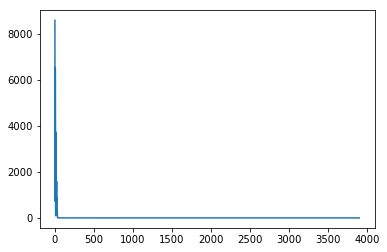

In [47]:
import matplotlib.pyplot as plt
plt.plot(loss_plot)
plt.show()